In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataset=pd.read_csv("./startup_funding.csv")

In [61]:
#Checks whether my file is properly loaded and what is the size of the datset
print(dataset.shape)

(2372, 10)


In [62]:
#Attributes name of the datset
print(dataset.columns)

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')


In [63]:
#glimpse of dataset. first 10 data points
dataset.head(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


In [64]:

print("Count of startup who don't get any funding:" )
n=dataset['AmountInUSD'].isnull().sum()
print(n)      
print(round((n/dataset.shape[0])*100),"% of startups were not able to get any funding.")

Count of startup who don't get any funding:
847
36.0 % of startups were not able to get any funding.


In [65]:
dataset["IndustryVertical"].value_counts().head(15)

Consumer Internet               772
Technology                      313
eCommerce                       171
ECommerce                        53
Healthcare                       30
Logistics                        24
Education                        20
Food & Beverage                  19
Finance                           9
Others                            6
Online Food Delivery              5
Online Education Platform         5
Real Estate                       4
ecommerce                         3
Hyperlocal Handyman Services      3
Name: IndustryVertical, dtype: int64

In [66]:
dataset["SubVertical"].value_counts().head(15)

Online Pharmacy                              9
Food Delivery Platform                       8
Online lending platform                      5
Online Learning Platform                     4
Fitness Mobile App                           3
Online Payment Gateway                       3
Data Analytics platform                      3
ECommerce Marketplace                        3
Medical Emergency Response App               2
Online fashion rental platform               2
Online ticket booking platform               2
Online Healthcare platform                   2
On-Demand Washing & Dry Cleaning Services    2
Fashion eTailer                              2
Online Real Estate Portal                    2
Name: SubVertical, dtype: int64

In [67]:
dataset["CityLocation"].value_counts().head(15)

Bangalore     627
Mumbai        446
New Delhi     381
Gurgaon       240
Pune           84
Noida          78
Hyderabad      76
Chennai        66
Ahmedabad      35
Jaipur         25
Kolkata        19
Chandigarh     10
Vadodara        9
Indore          9
Goa             7
Name: CityLocation, dtype: int64

In [68]:
#converting amount from string to Number
li = []
for i in dataset['AmountInUSD']:
    i = str(i)
    i = i.replace(',','')
    if i == np.nan:
        li.append(np.nan)
    else:
        li.append(float(i))
dataset['AmountInUSD'] = li
dataset.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN


In [69]:
#clearing NaN values
dataset['AmountInUSD'].isnull()
dataset['AmountInUSD'] = np.where(dataset['AmountInUSD'].isnull(), dataset['AmountInUSD'].mean(), dataset['AmountInUSD'])
li = []
for i in dataset['AmountInUSD']:
    i = float(i)
    li.append(int(i))
dataset['AmountInUSD'] = li
dataset['AmountInUSD'].head(20)

0      1300000
1     12031073
2     12031073
3       500000
4       850000
5      1000000
6      2600000
7     20000000
8      8500000
9     12000000
10     1000000
11    12031073
12    12031073
13     1000000
14    12031073
15     3000000
16     2250000
17      464000
18    12031073
19    18500000
Name: AmountInUSD, dtype: int64

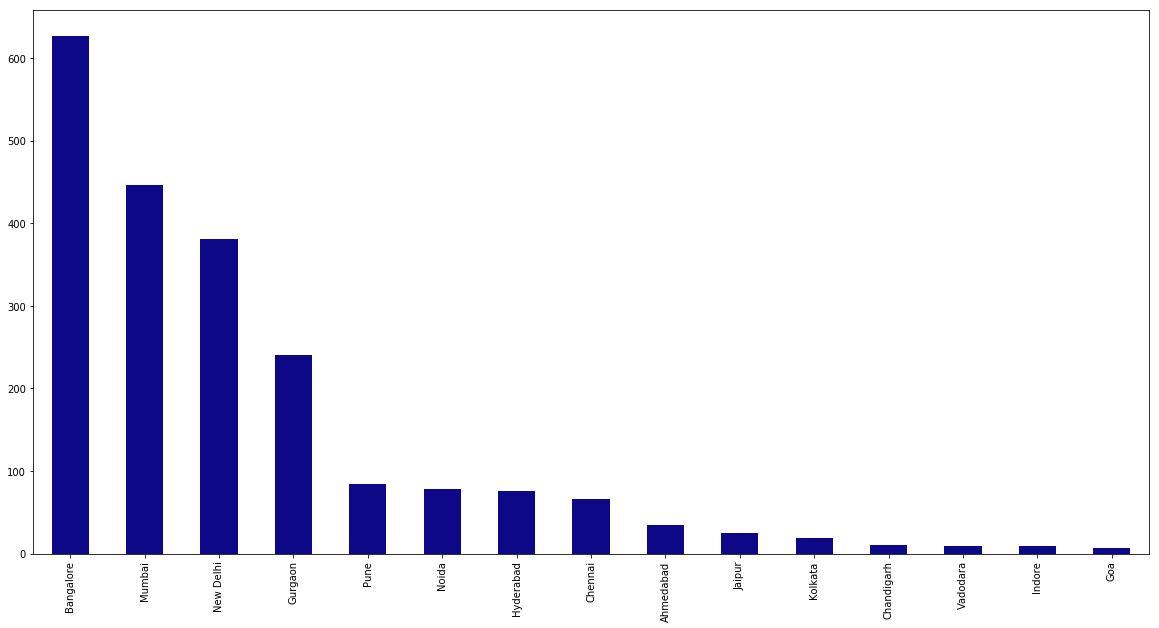

In [80]:
#Number of startups funded by City location(top 15 cities)
dataset['CityLocation'].value_counts().head(15).plot.bar(figsize=(20,10), colormap='plasma')
plt.show();

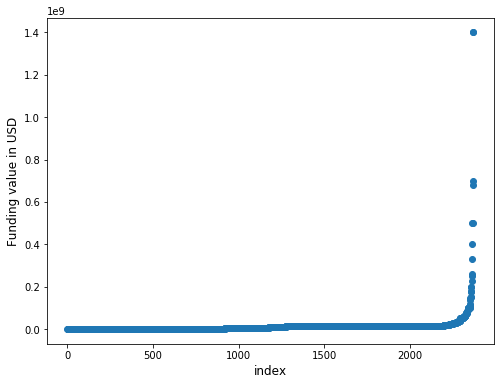

In [85]:
AmountInUSD = dataset["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
AmountInUSD = AmountInUSD[~np.isnan(AmountInUSD)]
plt.figure(figsize=(8,6))
plt.scatter(range(len(AmountInUSD)), np.sort(AmountInUSD.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Funding value in USD', fontsize=12)
plt.show()

C:\Users\kiit1\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


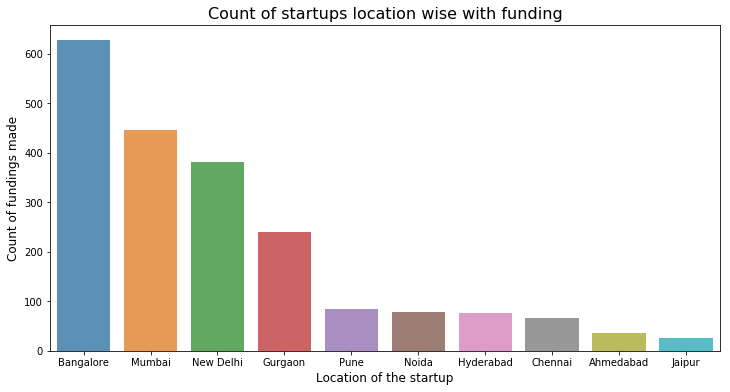

In [91]:
cnt_srs = dataset['CityLocation'].value_counts()[:10]
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)

plt.xlabel('Location of the startup', fontsize=12)
plt.ylabel('Count of fundings made', fontsize=12)
plt.title("Count of startups location wise with funding", fontsize=16)
plt.show()